## Class and functions

In [1]:
     
class prepro():
    def __init__(self, data):
        self.data=data
    
    def info(self):
        import pandas as pd 
        from pandas import Series, DataFrame
        
        print(self.data.head())
        
        print("DATA INFORMATION:")
        print(self.data.info())
        
        print("DATA DESCRIPTION:")
        print(self.data.describe())
        
        print("NULL VALUES:")
        print(self.data.isnull().sum(axis = 0))
    
class inf_stats(): 
    def __init__(self, data):
        self.data=data
        
    def corr(self):
        import seaborn as sns
        import matplotlib.pyplot as plt       
        fig,ax = plt.subplots(figsize=(7, 7))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

    def norm_test(self, column):
        import pylab
        import scipy.stats as stats
        from scipy.stats import shapiro
        
        print("H0: Data normally distributed\n")      
        
        
        stat, p= shapiro(self.data[column])
        print("Statistic= {} , p-val={}".format( stat, p))
        
        if p>0.05:
            print("H0-> Fail to Reject. Data is normally distributed.")
        else:
            print("H0-> Reject. Data is not normally distributed.")
        
        #Probability plot çizdirerek, görselleştirme de yapıyoruz.
        stats.probplot(self.data[column],dist='norm',plot=pylab)
        pylab.show()
        
    def t_test(self, popmean, column):
        import scipy.stats as stats 
        import statsmodels.stats.api as sms
        
        #one- sample t-test 
        self.column=column
        self.popmean=popmean
        print("Hypothesis:\nH0:μ0={}\n".format(self.popmean))
        
        #calculation of p-value and statistic
        stat, pval=stats.ttest_1samp(self.data[self.column],popmean=self.popmean)
        print('RESULT=\nStatistics=%.3f,p-value=%.3f' % (stat,pval))
        
        #confidence interval
        cf=sms.DescrStatsW(self.data[self.column]).tconfint_mean()
        print("Confidence Interval={}\n".format(cf))
        
        if pval<0.05:
            print("Reject H0 --> μ0≠{}". format(self.popmean))
        else:
            print("Fail to reject H0 --> μ0={}". format(self.popmean))
     
    def num_cat(self,cl1,cl2):
        import pandas as pd 
        import numpy as np 
        from scipy.stats import shapiro 
        A=Series(self.data[cl1].iloc[:][data[cl2]==1])
        B=Series(self.data[cl1].iloc[:][data[cl2]==0])
        
        #A_B=pd.concat([A,B], axis=1)
        #A_B.columns=["A","B"]

        print("    ******KS TEST******   ")
        print("HİPOTEZ:")
        print("H0:{}-{}=1 and {}-{} =0 have same distribution\n".format(cl1,cl2,cl1,cl2))
        import scipy
        
        stat, p=scipy.stats.ks_2samp(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different distribution\n")
        else:
            print("H0--> Fail to Reject.\n")
        
        import scipy.stats as stats
        
        print("VARIANCE:")
        print("HİPOTEZ:")
        print("H0:'{}' and '{}' have same variance\n".format(cl1,cl2))
        
        stat, p=stats.levene(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different variance\n")
        else:
            print("H0--> Fail to Reject.")
            
        if p<0.05:
            equal_var=False
        else:
            equal_var=True
        print("MEAN:")
        stat, p=stats.ttest_ind(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different mean\n")
        else:
            print("H0--> Fail to Reject.")
            
    def chi2(self,cl1,cl2):
        import scipy.stats 
        cross=pd.crosstab(index=self.data[cl2], columns=self.data[cl1])
        from numbers import Number
        chi2,p,dof,expected= scipy.stats.chi2_contingency(cross)#survived ve sex arasında bağlantı var mı?
        result=[["chi",chi2],["p",p]]
        print(result)

    
    
    def box_2samp(self,cl1,cl2):
        import matplotlib.pyplot as plt
        import seaborn as sns
        figg=plt.figure(figsize=(5,5))
        sns.boxplot(x=data[cl1],y=data[cl2])

class visualize():
    def __init__(self, data):
        self.data=data
    
    def hist_all(self):
        import matplotlib.pyplot as plt
        #self.column=column
        
        for col in self.data.columns:
            fig=self.data[col].plot.hist()
            fig.set_title(col)
            plt.show()
def result(model,X_train,X_test,y_train,y_test):
    print( "\033[1m","         ****** RESULT ****** ", "\033[0;0m")
    y_pred = model.predict(X_test)
    print("TEST Accuracy=",accuracy_score(y_test, y_pred))
    print("TEST Report=\n",classification_report(y_test,model.predict(X_test)),"\n")
    y_pred = model.predict(X_train)
    print("TRAIN Accuracy=",accuracy_score(y_train, y_pred))
    print("TRAIN Report=\n",classification_report(y_train,model.predict(X_train)),"\n")
    
    print("Cross Validation TEST:\n",cross_val_score(model, X_test, y_test, cv = 10).mean())    
    print("Cross Validation TRAIN:\n",cross_val_score(model, X_train, y_train, cv = 10).mean(),"\n")
    print("ROC CURVES")
    nb_roc_auc=roc_auc_score(y_test,model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Oranı')
    plt.ylabel('True Positive Oranı')
    plt.title('ROC-TEST')
    plt.show()
    nb_roc_auc=roc_auc_score(y_train,model.predict(X_train))
    fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % nb_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Oranı')
    plt.ylabel('True Positive Oranı')
    plt.title('ROC-TRAIN')
    plt.show() 
   

   

In [2]:
import pandas as pd
from pandas import Series, DataFrame
dat=pd.read_csv("hmelq.csv")
data=dat.copy()
data=data.dropna()
data.head()


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


# Data Information

In [3]:
df=prepro(data)
df.info()

     bad   loan   mortdue     value   reason  job   yoj  derog  delinq  \
153    0  18200   94727.0  136877.0  DebtCon  Mgr  15.0    0.0     0.0   
154    0  21700   79240.0   96784.0  DebtCon  Mgr   5.0    0.0     0.0   
155    0  34100  241931.0   36486.0  DebtCon  Mgr   1.0    0.0     2.0   
156    0   8400   62989.0   76718.0  HomeImp  Mgr   3.0    0.0     2.0   
157    0  17400   25859.0   43684.0  DebtCon  Mgr  16.0    1.0     0.0   

      clage  ninq  clno  debtinc  
153  168.96   2.0  26.0   36.056  
154   64.51   6.0  24.0   38.079  
155  196.01   3.0  50.0   42.459  
156  131.47   0.0  22.0   29.200  
157   95.36   1.0  17.0   27.108  
DATA INFORMATION:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null 

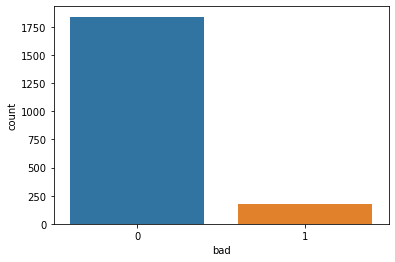

In [47]:
import seaborn as sns
sns.countplot("bad", data=data)

## Categorical Variables

In [66]:
col=data.columns
num_cols=data._get_numeric_data().columns
CAT=set(col)-set(num_cols)
CAT

{'job', 'reason'}

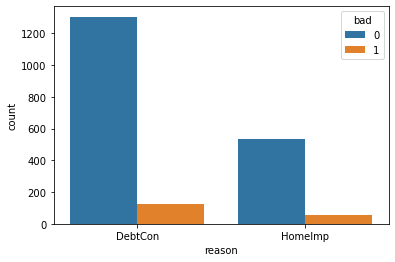

In [44]:
sns.countplot("reason", hue="bad", data=data)

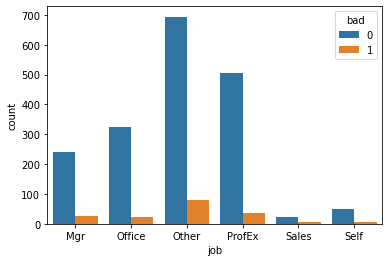

In [7]:
sns.countplot("job", hue="bad", data=data)

In [37]:
pd.crosstab(data["bad"], data["job"]).style.background_gradient(cmap="Oranges")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,242,326,694,504,23,51
1,27,22,80,35,7,7


In [32]:
pd.crosstab(data["bad"], data["reason"]).style.background_gradient(cmap="Oranges")

reason,DebtCon,HomeImp
bad,,
0,1304,536
1,124,54


In [79]:
df1=inf_stats(data)
df1.chi2("job","bad")

[['chi', 17.653162201450712], ['p', 0.0034140218372415696]]


In [80]:
df1.chi2("reason","bad")

[['chi', 0.06334081421292037], ['p', 0.8012915011681949]]


"reason" has no effect on "bad"

## Numerical Variables

In [81]:
num_data=data.drop(["bad","job","reason"],axis=1)

In [86]:
df_v=visualize(num_data)

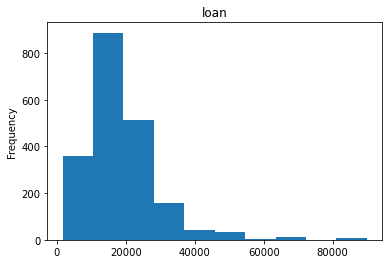

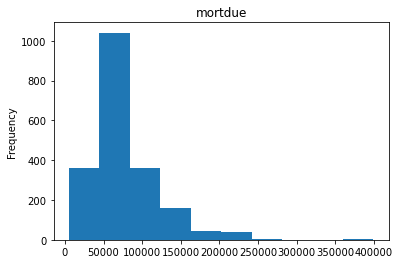

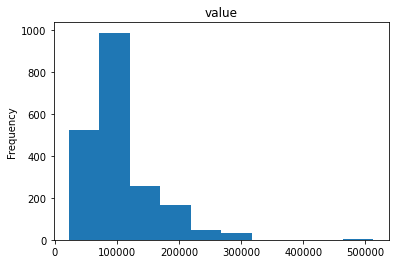

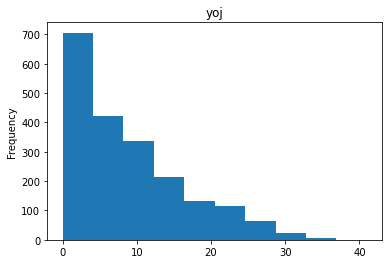

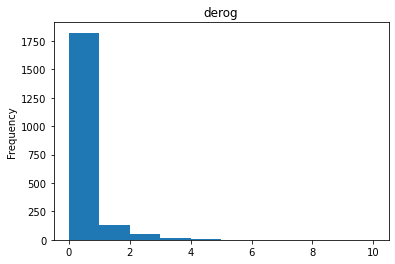

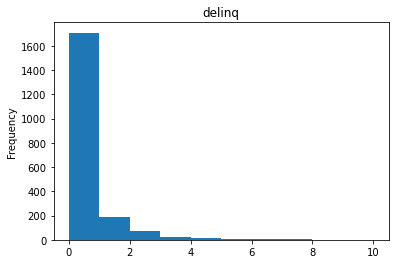

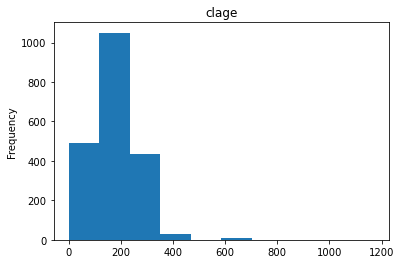

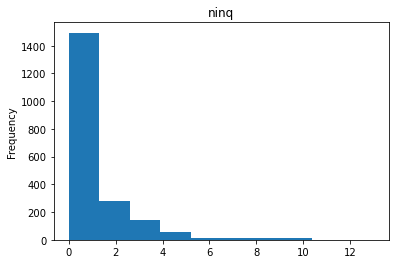

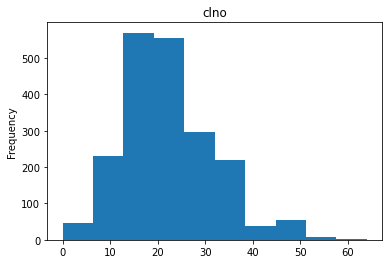

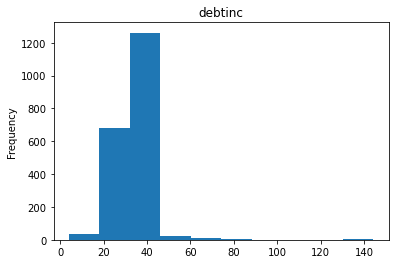

In [87]:
df_v.hist_all()

## Numerik Verilerin Normallik Testi

LOAN
H0: Data normally distributed

Statistic= 0.8360166549682617 , p-val=1.9721874586907475e-41
H0-> Reject. Data is not normally distributed.


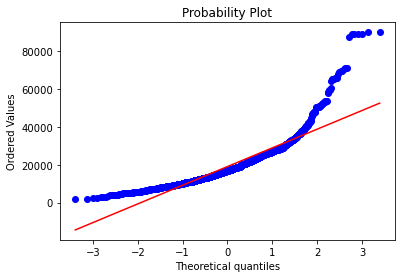

None
MORTDUE
H0: Data normally distributed

Statistic= 0.8624268174171448 , p-val=7.460412130575895e-39
H0-> Reject. Data is not normally distributed.


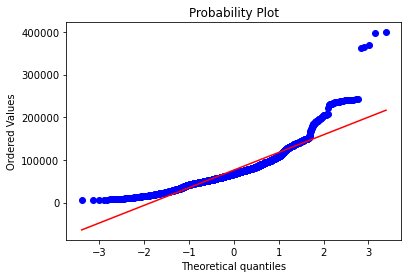

None
VALUE
H0: Data normally distributed

Statistic= 0.8436811566352844 , p-val=1.0142738414629458e-40
H0-> Reject. Data is not normally distributed.


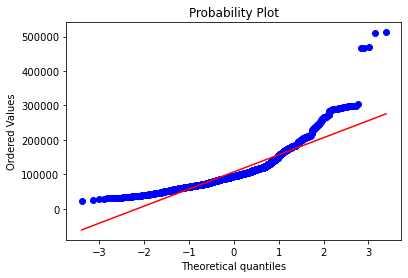

None
YOJ
H0: Data normally distributed

Statistic= 0.9115960597991943 , p-val=9.607595978546815e-33
H0-> Reject. Data is not normally distributed.


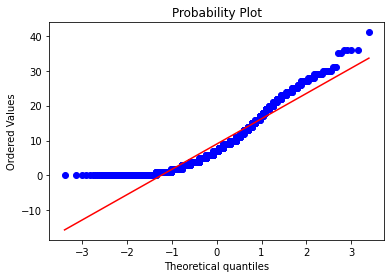

None
DEROG
H0: Data normally distributed

Statistic= 0.2769438624382019 , p-val=0.0
H0-> Reject. Data is not normally distributed.


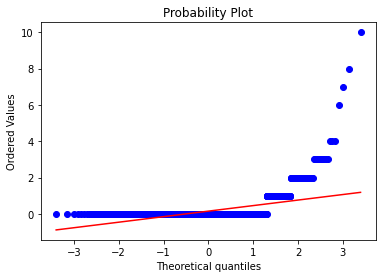

None
DELINQ
H0: Data normally distributed

Statistic= 0.3798753023147583 , p-val=0.0
H0-> Reject. Data is not normally distributed.


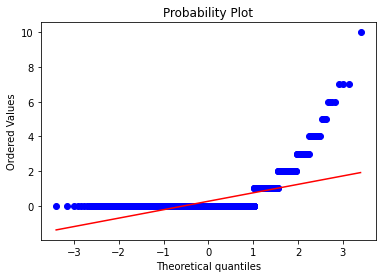

None
CLAGE
H0: Data normally distributed

Statistic= 0.9051468372344971 , p-val=1.112704769060138e-33
H0-> Reject. Data is not normally distributed.


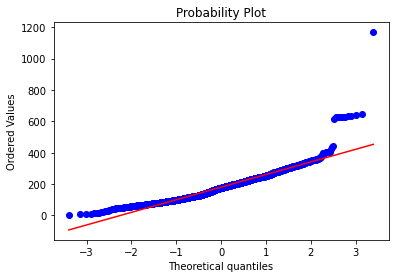

None
NINQ
H0: Data normally distributed

Statistic= 0.6690858602523804 , p-val=0.0
H0-> Reject. Data is not normally distributed.


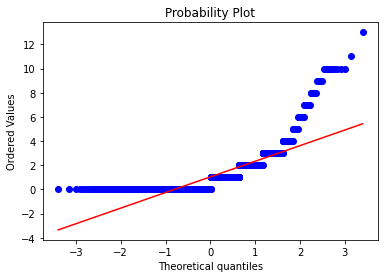

None
CLNO
H0: Data normally distributed

Statistic= 0.964141309261322 , p-val=5.696766726335972e-22
H0-> Reject. Data is not normally distributed.


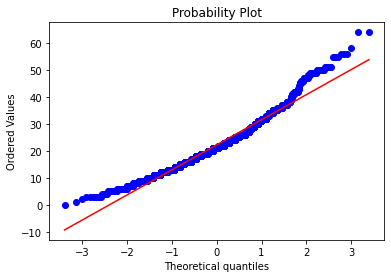

None
DEBTINC
H0: Data normally distributed

Statistic= 0.8244601488113403 , p-val=1.8707334498736308e-42
H0-> Reject. Data is not normally distributed.


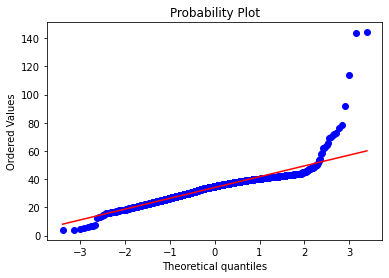

None


In [85]:
for col in num_data.columns:
    print(col.upper())
    print(df1.norm_test(col))

### Korelasyon 

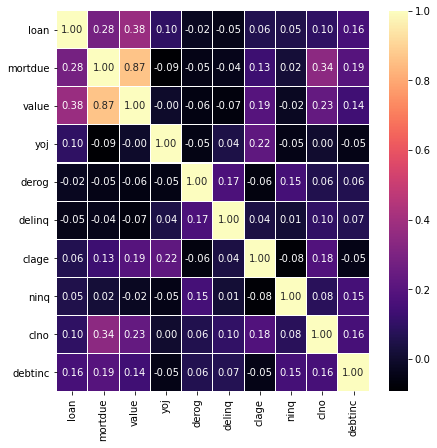

In [89]:
data_cor=inf_stats(num_data)
data_cor.corr()

In [ ]:
Korelasyon testi sonucunda value-mortdue ve value-loan arasında pozitif ilişki çıkmıştır.

### 2 Örneklem t-testi

In [99]:
for col in num_data.columns:
    df_test.num_cat(col,"bad")

    ******KS TEST******   
HİPOTEZ:
H0:loan-bad=1 and loan-bad =0 have same distribution

Statistic= 0.14465681485100146, p-val=0.001978887444979316
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'loan' and 'bad' have same variance

Statistic= 2.3947745891982195, p-val=0.12189825252399986
H0--> Fail to Reject.
MEAN:
Statistic= -1.176054303533842, p-val=0.23971203285250864
H0--> Fail to Reject.
    ******KS TEST******   
HİPOTEZ:
H0:mortdue-bad=1 and mortdue-bad =0 have same distribution

Statistic= 0.13398265754763067, p-val=0.005274509868711474
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'mortdue' and 'bad' have same variance

Statistic= 2.3073764505136856, p-val=0.12891801775903636
H0--> Fail to Reject.
MEAN:
Statistic= -1.127470718824357, p-val=0.259677683857574
H0--> Fail to Reject.
    ******KS TEST******   
HİPOTEZ:
H0:value-bad=1 and value-bad =0 have same distribution

Statistic= 0.1447545188080117, p-val=0.0019656922486886996
H0

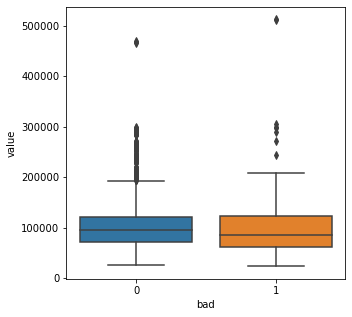

In [96]:
df_test.box_2samp("bad","value")

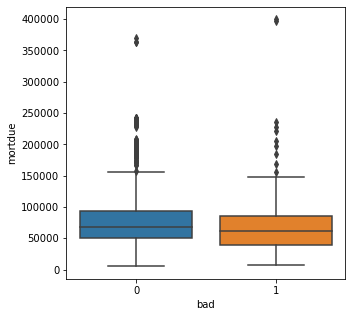

In [98]:
df_test.box_2samp("bad","mortdue")

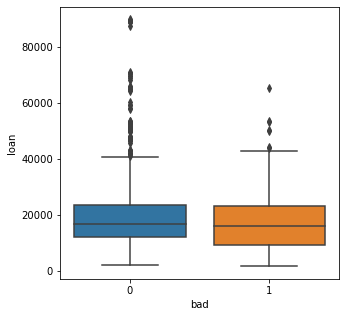

In [97]:
df_test.box_2samp("bad","loan")

# Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
import pandas as pd
dat=pd.read_csv("hmelq.csv")
data_model=dat.copy()
data_model=data_model.dropna()

In [4]:
dms=pd.get_dummies(data_model[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [5]:
y=data_model["bad"]
X_=data_model.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


# statsmodels

## Feature Elimination

In [7]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.242501
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1598
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1897
Time:                        19:42:20   Log-Likelihood:                -391.40
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 5.126e-31
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.976e-05   1.19e-05     -2.504      0.012   -5.31e-05   -6.46e-06
mortdue        -1.942e-06   5.19e-06     -0.374      0.708   -1.21e-05    8.24e-06
value           9.806e-07   4.52e-06      0.217      0.828   -7.87e-06    9.84e-06
yoj               -0.0149      0.015     -1.014      0.310      -0.044       0.014
derog              0.5451      0.149      3.646      0.000       0.252       0.838
delinq             0.7886      0.102      7.719      0.000       0.588       0.989
clage             -0.0064      0.002     -4.237      0.000      -0.009      -0.003
ninq               0.0866      0.051      1.709      0.087      -0.013       0.186
clno              -0.0357      0.012     -3.053      0.002      -0.059      -0.013
debtinc            0.0631      0.011      5.667      0.000       0.041       0.085
job_Mgr           -2.5085      0.396     -6.341      0.000      -3.284      -1.733
job_Office        -3.0032      0.415     -7.240      0.000      -3.816      -2.190
job_Other         -2.7573      0.344     -8.025      0.000      -3.431      -2.084
job_ProfEx        -2.5386      0.365     -6.950      0.000      -3.254      -1.823
job_Sales         -2.0808      0.771     -2.699      0.007      -3.592      -0.570
reason_DebtCon    -0.0382      0.214     -0.179      0.858      -0.457       0.380
==================================================================================
"""

In [9]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,5.307816,loan
1,18.882950,mortdue
2,23.532982,value
3,2.729098,yoj
4,1.153330,derog
5,1.176896,delinq
6,6.159462,clage
7,1.573974,ninq
8,7.899643,clno
9,15.641711,debtinc


In [10]:
remove=vif["features"].iloc[:][vif["VIF Factor"]>10]
remove

1    mortdue
2      value
9    debtinc
Name: features, dtype: object

In [11]:
X_train=X_train.drop(["value","mortdue","yoj","ninq","reason_DebtCon"],axis=1)

In [12]:
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.243753
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1603
Method:                           MLE   Df Model:                           10
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1856
Time:                        19:42:21   Log-Likelihood:                -393.42
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 3.335e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan        -2.98e-05   1.04e-05     -2.872      0.004   -5.01e-05   -9.46e-06
derog          0.5905      0.145      4.065      0.000       0.306       0.875
delinq         0.7730      0.099      7.788      0.000       0.578       0.967
clage         -0.0071      0.001     -4.901      0.000      -0.010      -0.004
clno          -0.0360      0.011     -3.235      0.001      -0.058      -0.014
debtinc        0.0639      0.011      5.973      0.000       0.043       0.085
job_Mgr       -2.5034      0.375     -6.669      0.000      -3.239      -1.768
job_Office    -3.0132      0.394     -7.654      0.000      -3.785      -2.242
job_Other     -2.7523      0.317     -8.670      0.000      -3.375      -2.130
job_ProfEx    -2.5810      0.350     -7.367      0.000      -3.268      -1.894
job_Sales     -2.0790      0.756     -2.751      0.006      -3.560      -0.598
==============================================================================
"""

In [13]:
X_test=X_test.drop(["value","mortdue","yoj","ninq","reason_DebtCon"],axis=1)

## sklearn

In [15]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [16]:
accuracy_score(y_train,loj_model.predict(X_train))

0.9206939281288724

In [17]:
confusion_matrix(y_train,loj_model.predict(X_train))

array([[1468,    3],
       [ 125,   18]], dtype=int64)

In [20]:
print(classification_report(y_train,loj_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1471
           1       0.86      0.13      0.22       143

    accuracy                           0.92      1614
   macro avg       0.89      0.56      0.59      1614
weighted avg       0.92      0.92      0.89      1614



In [18]:
y_pred=loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9232673267326733

In [17]:
confusion_matrix(y_test,y_pred)

array([[368,   1],
       [ 30,   5]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.83      0.14      0.24        35

    accuracy                           0.92       404
   macro avg       0.88      0.57      0.60       404
weighted avg       0.92      0.92      0.90       404



In [19]:
loj_model.predict_proba(X_test)[0:10]

array([[0.96754999, 0.03245001],
       [0.95768171, 0.04231829],
       [0.93657609, 0.06342391],
       [0.98491986, 0.01508014],
       [0.79082213, 0.20917787],
       [0.84187626, 0.15812374],
       [0.89381823, 0.10618177],
       [0.9594902 , 0.0405098 ],
       [0.99431085, 0.00568915],
       [0.96596545, 0.03403455]])

In [20]:
y_probs=loj_model.predict_proba(X_test)
y_probs=y_probs[:,1]
y_pred2=[1 if i>0.4 else 0 for i in y_probs]


In [21]:
confusion_matrix(y_test,y_pred2)

array([[367,   2],
       [ 29,   6]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       369
           1       0.75      0.17      0.28        35

    accuracy                           0.92       404
   macro avg       0.84      0.58      0.62       404
weighted avg       0.91      0.92      0.90       404



In [21]:
y_probs=loj_model.predict_proba(X_test)
y_probs=y_probs[:,1]
y_pred3=[1 if i>0.2 else 0 for i in y_probs]

In [22]:
confusion_matrix(y_test,y_pred3)

array([[340,  29],
       [ 20,  15]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       369
           1       0.34      0.43      0.38        35

    accuracy                           0.88       404
   macro avg       0.64      0.67      0.66       404
weighted avg       0.89      0.88      0.88       404



In [26]:
cross_val_score(loj_model,X_test,y_test, cv=10).mean()

0.9209756097560975

In [27]:
cross_val_score(loj_model,X_train,y_train, cv=10).mean()

0.9200674794877692

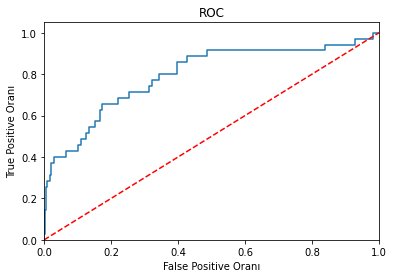

In [28]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

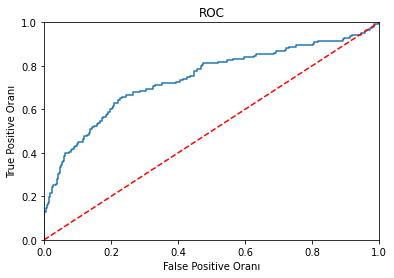

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc=roc_auc_score(y_train,loj_model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, loj_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

## Decision Trees (Classification)

In [5]:
import io
import pandas as pd
bank=pd.read_csv("hmelq.csv")
df=bank.copy()
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


## Dummy encoding

In [7]:
dms=pd.get_dummies(df[["job","reason"]])
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Feature Elimination

 In previous studies, after implemantation of t-test "loan","mortdue","value","clno" were found as ineffective. For chi^2 test, "reason" was found as ineffective.
 In addition , variance inflation factor was applied, as a result,  "mortdue","value" and "debtinc" were found as variables that had multicollinearity .

In [9]:
X_train=X_train.drop(["value","mortdue","clno","reason_DebtCon"],axis=1)

In [10]:
X_test=X_test.drop(["value","mortdue","clno","reason_DebtCon"],axis=1)

In [11]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from skompiler import skompile
from sklearn import tree

In [12]:
cart=DecisionTreeClassifier(random_state=42)
cart_model=cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(random_state=42)

### Predict 

In [124]:
cart_model.predict(X_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

          ****** RESULT ******  
TEST Accuracy= 0.9148514851485149
TEST Report=
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       466
           1       0.46      0.54      0.49        39

    accuracy                           0.91       505
   macro avg       0.71      0.74      0.72       505
weighted avg       0.92      0.91      0.92       505
 

TRAIN Accuracy= 1.0
TRAIN Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1374
           1       1.00      1.00      1.00       139

    accuracy                           1.00      1513
   macro avg       1.00      1.00      1.00      1513
weighted avg       1.00      1.00      1.00      1513
 

Cross Validation TEST:
 0.8989411764705884
Cross Validation TRAIN:
 0.9088053328685952 

ROC CURVES


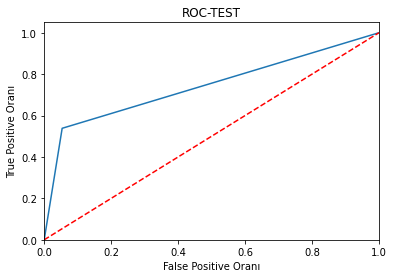

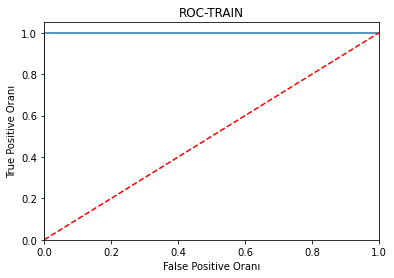

In [125]:
result(model=cart_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### Model Tuning

In [159]:
cart_grid={"max_depth":range(1,10),"min_samples_split":range(10,50)}

In [160]:
cart=DecisionTreeClassifier()

In [161]:
cart_cv=GridSearchCV(cart,cart_grid,cv=10,n_jobs=-1,verbose=2)

In [162]:
cart_cv_model=cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   21.6s finished


In [163]:
print("en iyi parametreler"+ str(cart_cv_model.best_params_))

en iyi parametreler{'max_depth': 2, 'min_samples_split': 37}


In [126]:
cart2=tree.DecisionTreeClassifier(max_depth=2,min_samples_split=37)

In [127]:
cart_tuned=cart2b.fit(X_train,y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9148514851485149
TEST Report=
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       466
           1       0.46      0.54      0.49        39

    accuracy                           0.91       505
   macro avg       0.71      0.74      0.72       505
weighted avg       0.92      0.91      0.92       505
 

TRAIN Accuracy= 1.0
TRAIN Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1374
           1       1.00      1.00      1.00       139

    accuracy                           1.00      1513
   macro avg       1.00      1.00      1.00      1513
weighted avg       1.00      1.00      1.00      1513
 

Cross Validation TEST:
 0.8989411764705884
Cross Validation TRAIN:
 0.9088053328685952 

ROC CURVES


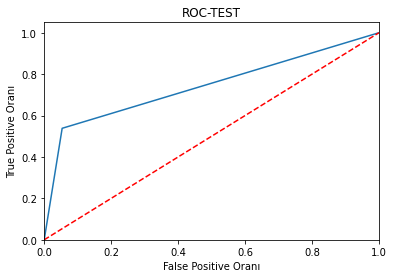

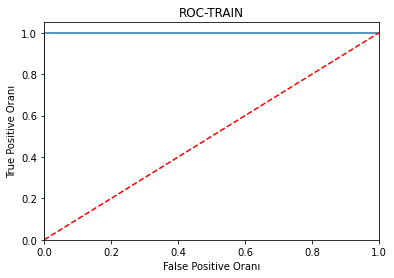

In [128]:
result(model=cart_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

<Figure size 2880x1440 with 0 Axes>

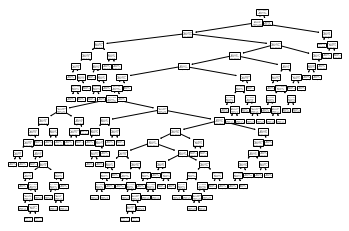

<Figure size 2880x1440 with 0 Axes>

In [169]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(cart_model)
plt.figure(figsize=(40,20))

## RANDOM FOREST

In [129]:
from sklearn.ensemble import RandomForestClassifier


In [130]:
rf_model=RandomForestClassifier(random_state=42).fit(X_train,y_train)


          ****** RESULT ******  
TEST Accuracy= 0.9504950495049505
TEST Report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       0.89      0.41      0.56        39

    accuracy                           0.95       505
   macro avg       0.92      0.70      0.77       505
weighted avg       0.95      0.95      0.94       505
 

TRAIN Accuracy= 1.0
TRAIN Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1374
           1       1.00      1.00      1.00       139

    accuracy                           1.00      1513
   macro avg       1.00      1.00      1.00      1513
weighted avg       1.00      1.00      1.00      1513
 

Cross Validation TEST:
 0.9385882352941177
Cross Validation TRAIN:
 0.9352256883931684 

ROC CURVES


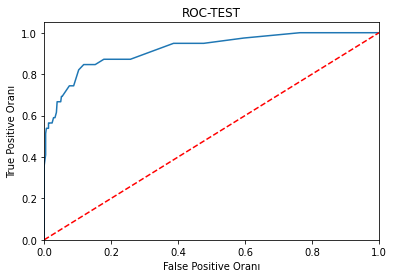

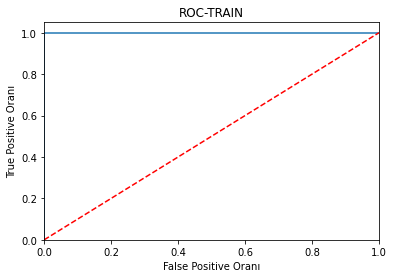

In [131]:
result(model=rf_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Model Tuning

In [43]:
rf_params={"max_depth":[2,5,8,10],
         "max_features":[2,5,8],
         "n_estimators":[10,50,100],
         "min_samples_split":[5,10]}

In [44]:
rf_model=RandomForestClassifier()

In [45]:
rf_cv=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)

In [46]:
rf_cv_model=rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.8min finished


In [48]:
print("en iyi parametreler"+ str(rf_cv_model.best_params_))

en iyi parametreler{'max_depth': 10, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 100}


In [132]:
rf_tuned=RandomForestClassifier(max_depth= 10, max_features= 8, min_samples_split= 10, n_estimators= 100)

In [133]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10)

          ****** RESULT ******  
TEST Accuracy= 0.9465346534653465
TEST Report=
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       466
           1       0.80      0.41      0.54        39

    accuracy                           0.95       505
   macro avg       0.88      0.70      0.76       505
weighted avg       0.94      0.95      0.94       505
 

TRAIN Accuracy= 0.9517514871116987
TRAIN Report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1374
           1       0.97      0.49      0.65       139

    accuracy                           0.95      1513
   macro avg       0.96      0.74      0.81      1513
weighted avg       0.95      0.95      0.94      1513
 

Cross Validation TEST:
 0.9405490196078432
Cross Validation TRAIN:
 0.9371993726036948 

ROC CURVES


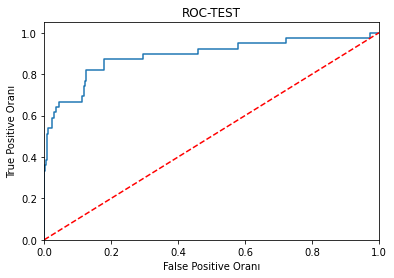

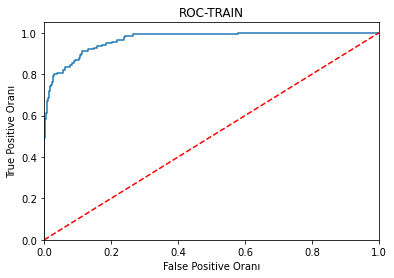

In [134]:
result(model=rf_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [135]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

Text(0.5, 0, 'Değişken Önem düzeyleri')

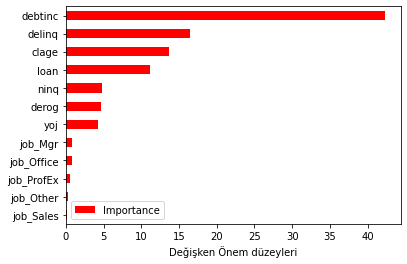

In [136]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken Önem düzeyleri")

# Neural Network

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler=StandardScaler()

In [139]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [140]:
X_test_scaled[0:5]

array([[ 0.66624605, -1.20321558,  1.53951404, -0.33062394,  0.08414469,
         0.54408335,  0.12173563, -0.40145553, -0.43634993, -0.81178275,
         1.69690518, -0.12424267],
       [ 0.20731422, -0.41159425, -0.27598459, -0.33062394,  0.38301949,
         1.74495586,  1.04746295, -0.40145553,  2.29173867, -0.81178275,
        -0.58930812, -0.12424267],
       [-0.18862697, -0.67546803, -0.27598459, -0.33062394, -0.28962489,
        -0.65678916, -0.97955869, -0.40145553,  2.29173867, -0.81178275,
        -0.58930812, -0.12424267],
       [-0.26061628, -0.01578359, -0.27598459, -0.33062394,  1.45983745,
        -0.65678916, -0.76565477, -0.40145553, -0.43634993, -0.81178275,
        -0.58930812, -0.12424267],
       [-1.07949465,  1.69939594, -0.27598459, -0.33062394, -0.72748938,
        -0.65678916,  0.40379407, -0.40145553,  2.29173867, -0.81178275,
        -0.58930812, -0.12424267]])

In [141]:
from sklearn.neural_network import MLPClassifier

In [146]:
mlpc=MLPClassifier(max_iter=5000,random_state=42).fit(X_train_scaled,y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9584158415841584
TEST Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.91      0.51      0.66        39

    accuracy                           0.96       505
   macro avg       0.93      0.75      0.82       505
weighted avg       0.96      0.96      0.95       505
 

TRAIN Accuracy= 0.9867812293456708
TRAIN Report=
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1374
           1       0.99      0.86      0.92       139

    accuracy                           0.99      1513
   macro avg       0.99      0.93      0.96      1513
weighted avg       0.99      0.99      0.99      1513
 

Cross Validation TEST:
 0.9226666666666666
Cross Validation TRAIN:
 0.9365589055420006 

ROC CURVES


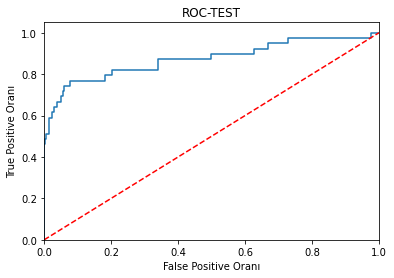

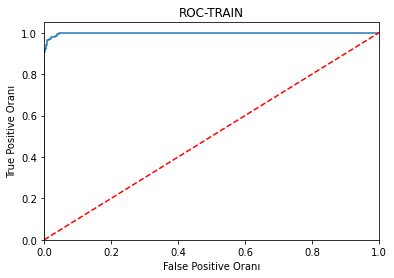

In [147]:
result(model=mlpc,X_train=X_train_scaled,X_test=X_test_scaled,y_train=y_train,y_test=y_test)

## Model Tuning

In [199]:
mlpc_params={"alpha":[0.1,0.01,0.02],
            "hidden_layer_sizes":[(2,2),(3,3), (5,5)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["relu","logistic"]}

In [200]:
mlpc=MLPClassifier()
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=5,
                          n_jobs=-1,
                          verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02],
                         'hidden_layer_sizes': [(2, 2), (3, 3), (5, 5)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [201]:
print("en iyi parametreler:"+str(mlpc_cv_model.best_params_))

en iyi parametreler:{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (2, 2), 'solver': 'lbfgs'}


In [148]:
mlpc_tuned=MLPClassifier(activation="logistic",alpha=0.1,max_iter=1000,
                        hidden_layer_sizes=(2,2),
                        solver="lbfgs")

In [149]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(2, 2),
              max_iter=1000, solver='lbfgs')

          ****** RESULT ******  
TEST Accuracy= 0.9465346534653465
TEST Report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       0.88      0.36      0.51        39

    accuracy                           0.95       505
   macro avg       0.91      0.68      0.74       505
weighted avg       0.94      0.95      0.94       505
 

TRAIN Accuracy= 0.9405155320555189
TRAIN Report=
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1374
           1       0.88      0.41      0.56       139

    accuracy                           0.94      1513
   macro avg       0.91      0.70      0.76      1513
weighted avg       0.94      0.94      0.93      1513
 

Cross Validation TEST:
 0.9405882352941177
Cross Validation TRAIN:
 0.9292784942488671 

ROC CURVES


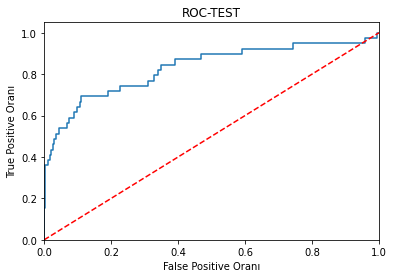

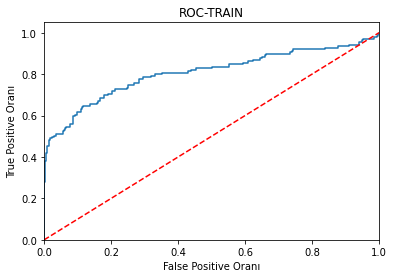

In [150]:
result(model=mlpc_tuned,X_train=X_train_scaled,X_test=X_test_scaled,y_train=y_train,y_test=y_test)

# Support Vector Machines 

In [13]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# SVM

In [ ]:
svm_model = SVC(kernel = "linear",probability=True).fit(X_train, y_train)
svm_model

In [ ]:
result(model=svm_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Model Tuning


In [ ]:
svc_params = {"C": np.arange(1,5,1)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

It takes a long time....

### c=5

In [ ]:
svc_tuned1 = SVC(kernel = "linear", C = 5,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9287128712871288

In [ ]:
y_pred = svc_tuned1.predict(X_train)
accuracy_score(y_train, y_pred)

0.9173826834104428

In [ ]:
print(classification_report(y_train,svc_tuned1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.68      0.19      0.29       139

    accuracy                           0.92      1513
   macro avg       0.80      0.59      0.62      1513
weighted avg       0.90      0.92      0.90      1513



In [ ]:
print(classification_report(y_test,svc_tuned1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       466
           1       0.62      0.21      0.31        39

    accuracy                           0.93       505
   macro avg       0.78      0.60      0.64       505
weighted avg       0.91      0.93      0.91       505



In [ ]:
cross_val_score(svc_tuned1,X_test,y_test, cv=10).mean()

0.9267058823529413

### c=6

In [ ]:
svc_tuned3 = SVC(kernel = "linear", C = 6,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9306930693069307

In [ ]:
y_pred = svc_tuned3.predict(X_train)
accuracy_score(y_train, y_pred)

0.9180436219431592

In [ ]:
print(classification_report(y_train,svc_tuned3.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.76      0.16      0.26       139

    accuracy                           0.92      1513
   macro avg       0.84      0.58      0.61      1513
weighted avg       0.91      0.92      0.89      1513



In [ ]:
print(classification_report(y_test,svc_tuned3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       466
           1       0.67      0.21      0.31        39

    accuracy                           0.93       505
   macro avg       0.80      0.60      0.64       505
weighted avg       0.92      0.93      0.91       505



### c=8

In [ ]:
svc_tuned4 = SVC(kernel = "linear", C = 8,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned4.predict(X_test)
accuracy_score(y_test, y_pred)

0.9267326732673268

In [ ]:
y_pred = svc_tuned4.predict(X_train)
accuracy_score(y_train, y_pred)

0.914738929279577

In [ ]:
print(classification_report(y_train,svc_tuned4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1374
           1       0.64      0.17      0.26       139

    accuracy                           0.91      1513
   macro avg       0.78      0.58      0.61      1513
weighted avg       0.90      0.91      0.89      1513



In [ ]:
print(classification_report(y_test,svc_tuned4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       466
           1       0.60      0.15      0.24        39

    accuracy                           0.93       505
   macro avg       0.77      0.57      0.60       505
weighted avg       0.91      0.93      0.91       505



### c=10

In [ ]:
svc_tuned2 = SVC(kernel = "linear", C = 10,random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9267326732673268

In [ ]:
y_pred = svc_tuned2.predict(X_train)
accuracy_score(y_train, y_pred)

0.9160608063450099

In [ ]:
print(classification_report(y_train,svc_tuned2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.70      0.15      0.25       139

    accuracy                           0.92      1513
   macro avg       0.81      0.57      0.60      1513
weighted avg       0.90      0.92      0.89      1513



In [ ]:
print(classification_report(y_test,svc_tuned2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       466
           1       0.60      0.15      0.24        39

    accuracy                           0.93       505
   macro avg       0.77      0.57      0.60       505
weighted avg       0.91      0.93      0.91       505



# RBF SVC

In [16]:
svc_model = SVC(kernel = "rbf", probability=True).fit(X_train, y_train)
svc_model

SVC(probability=True)

          ****** RESULT ******  
TEST Accuracy= 0.9227722772277228
TEST Report=
 

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505
 

TRAIN Accuracy= 0.9081295439524124


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN Report=
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513
 

Cross Validation TEST:
 0.9227843137254901
Cross Validation TRAIN:
 0.9081300104566052 

ROC CURVES


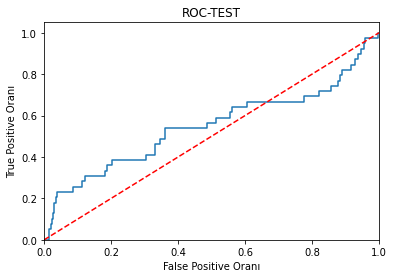

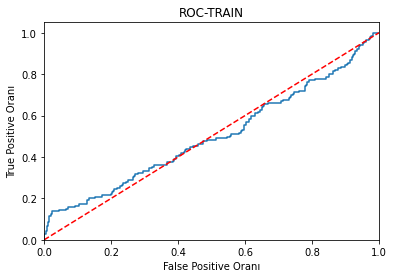

In [17]:
result(model=svc_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:

svc_params = {"C": np.arange(0, 5, 0.1),
             "gamma": np.arange(0.1, 5, 0.1)}
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)             

Fitting 10 folds for each of 2450 candidates, totalling 24500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1035 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 1318 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1683 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2655 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3262 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3951 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4720 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5571 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 6502 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 7515 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 8608 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 9783 tasks      

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,...
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])}

In [ ]:
str(svc_cv_model.best_params_)

"{'C': 0.1, 'gamma': 0.1}"

In [18]:
svc_tuned = SVC(kernel="rbf",C = 0.1, gamma = 0.1,probability=True).fit(X_train, y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9227722772277228


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TEST Report=
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505
 

TRAIN Accuracy= 0.9081295439524124


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN Report=
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513
 

Cross Validation TEST:
 0.9227843137254901
Cross Validation TRAIN:
 0.9081300104566052 

ROC CURVES


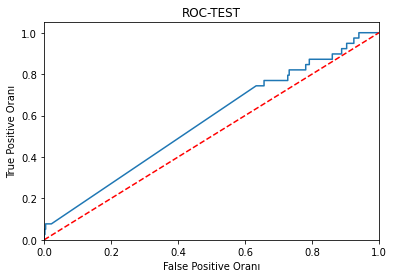

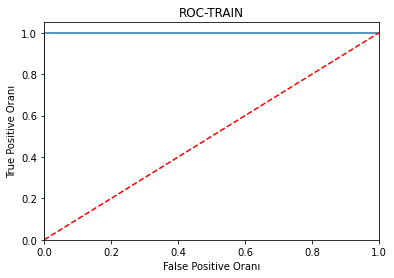

In [19]:
result(model=svc_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Naive Bayes 

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

          ****** RESULT ******  
TEST Accuracy= 0.9168316831683169
TEST Report=
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       466
           1       0.45      0.38      0.42        39

    accuracy                           0.92       505
   macro avg       0.70      0.67      0.69       505
weighted avg       0.91      0.92      0.91       505
 

TRAIN Accuracy= 0.8929279576999339
TRAIN Report=
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1374
           1       0.41      0.38      0.40       139

    accuracy                           0.89      1513
   macro avg       0.67      0.66      0.67      1513
weighted avg       0.89      0.89      0.89      1513
 

Cross Validation TEST:
 0.9168235294117647
Cross Validation TRAIN:
 0.8902579295921924 

ROC CURVES


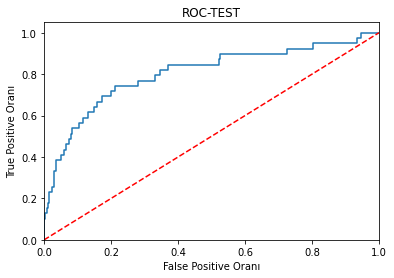

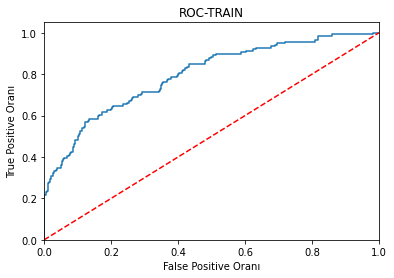

In [117]:
result(model=nb_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Model Tuning

In [ ]:
nb_params={"priors":[(0.1,0.9),(0.2,0.8)]}

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_cv=GridSearchCV(nb_model,nb_params,cv=10,n_jobs = -1,verbose = 2)
nb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'priors': [(0.1, 0.9), (0.2, 0.8)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
nb_cv.best_score_

0.7521348902056466

In [ ]:
nb_cv.best_params_

{'priors': (0.2, 0.8)}

In [90]:
nb_tuned=GaussianNB(priors=(0.2, 0.8))
nb_tuned.fit(X_train,y_train)

GaussianNB(priors=(0.2, 0.8))

          ****** RESULT ******  
TEST Accuracy= 0.8712871287128713
TEST Report=
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       466
           1       0.31      0.54      0.39        39

    accuracy                           0.87       505
   macro avg       0.63      0.72      0.66       505
weighted avg       0.91      0.87      0.89       505
 

TRAIN Accuracy= 0.8493060145406477
TRAIN Report=
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1374
           1       0.32      0.55      0.40       139

    accuracy                           0.85      1513
   macro avg       0.63      0.72      0.66      1513
weighted avg       0.89      0.85      0.87      1513
 

Cross Validation TEST:
 0.8178431372549019
Cross Validation TRAIN:
 0.8433469850121993 

ROC CURVES


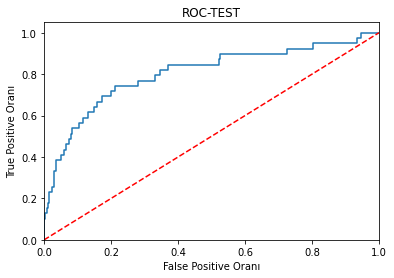

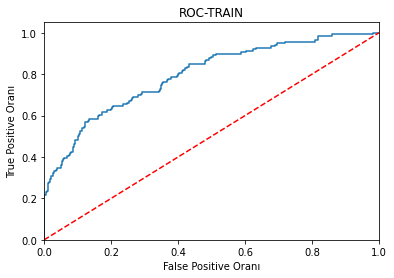

In [116]:
result(model=nb_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

# Gradient Boosting Machines


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9564356435643564
TEST Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.95      0.46      0.62        39

    accuracy                           0.96       505
   macro avg       0.95      0.73      0.80       505
weighted avg       0.96      0.96      0.95       505
 

TRAIN Accuracy= 0.9623265036351619
TRAIN Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1374
           1       1.00      0.59      0.74       139

    accuracy                           0.96      1513
   macro avg       0.98      0.79      0.86      1513
weighted avg       0.96      0.96      0.96      1513
 

Cross Validation TEST:
 0.9287058823529412
Cross Validation TRAIN:
 0.9345677936563263 

ROC CURVES


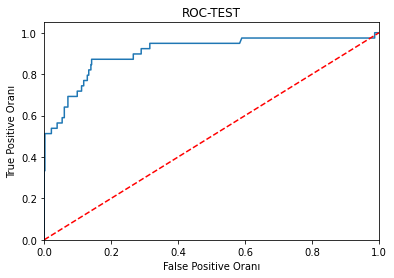

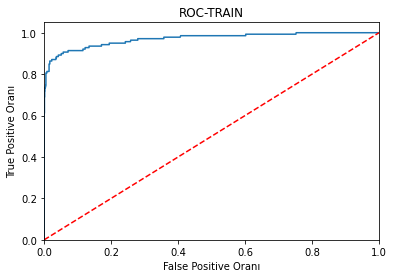

In [115]:
result(model=gbm_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Model Tuning

In [ ]:
gbm_params = {"learning_rate" : [ 0.01, 0.1, 0.05],
             "n_estimators": [100,200,500],
             "max_depth": [3,5,7],
            "criterion":['friedman_mse', 'mse', 'mae']}

In [ ]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 81.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [ ]:
gbm_cv.best_params_

{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [60]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                criterion="mse",
                                n_estimators = 100)

In [61]:
gbm_tuned =  gbm.fit(X_train,y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9564356435643564
TEST Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.95      0.46      0.62        39

    accuracy                           0.96       505
   macro avg       0.95      0.73      0.80       505
weighted avg       0.96      0.96      0.95       505
 

TRAIN Accuracy= 0.9623265036351619
TRAIN Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1374
           1       1.00      0.59      0.74       139

    accuracy                           0.96      1513
   macro avg       0.98      0.79      0.86      1513
weighted avg       0.96      0.96      0.96      1513
 

Cross Validation TEST:
 0.9267450980392157
Cross Validation TRAIN:
 0.9372037295224818 

ROC CURVES


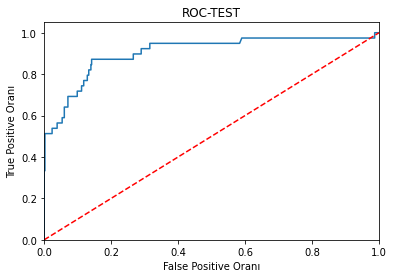

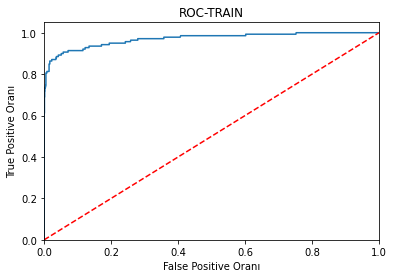

In [114]:
result(model=gbm_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

# XGBoost


In [22]:
from xgboost import XGBClassifier

In [26]:
xgb_model = XGBClassifier().fit(X_train, y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9504950495049505
TEST Report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       0.94      0.38      0.55        39

    accuracy                           0.95       505
   macro avg       0.94      0.69      0.76       505
weighted avg       0.95      0.95      0.94       505
 

TRAIN Accuracy= 0.9517514871116987
TRAIN Report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1374
           1       1.00      0.47      0.64       139

    accuracy                           0.95      1513
   macro avg       0.97      0.74      0.81      1513
weighted avg       0.95      0.95      0.94      1513
 

Cross Validation TEST:
 0.9365882352941177
Cross Validation TRAIN:
 0.9312608922969676 

ROC CURVES


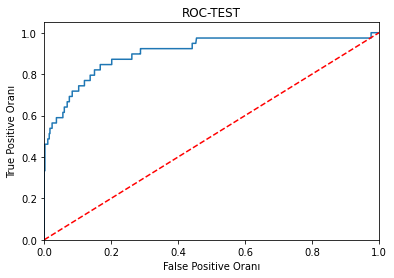

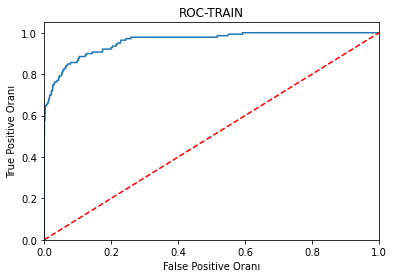

In [113]:
result(model=xgb_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)



## Model Tuning

In [ ]:
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0, 0.5, 1.0],
        'max_depth': [3,5,7],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "sampling_method": ["uniform", "gradient_based"]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1097 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 2157 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 15.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
   

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 1000,
 'sampling_method': 'uniform',
 'subsample': 0.5}

In [23]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 5,
                    sampling_method = 'uniform',
                    n_estimators = 1000,
                    subsample = 0.5)

In [24]:
xgb_tuned =  xgb.fit(X_train,y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9544554455445544
TEST Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.90      0.46      0.61        39

    accuracy                           0.95       505
   macro avg       0.93      0.73      0.79       505
weighted avg       0.95      0.95      0.95       505
 

TRAIN Accuracy= 0.9722405816259088
TRAIN Report=
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1374
           1       1.00      0.70      0.82       139

    accuracy                           0.97      1513
   macro avg       0.99      0.85      0.90      1513
weighted avg       0.97      0.97      0.97      1513
 

Cross Validation TEST:
 0.9405882352941177
Cross Validation TRAIN:
 0.9359010108051586 

ROC CURVES


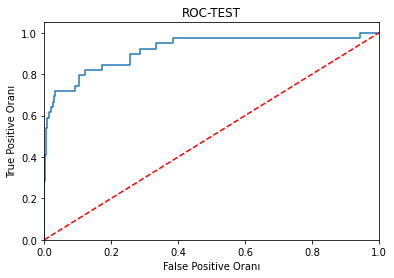

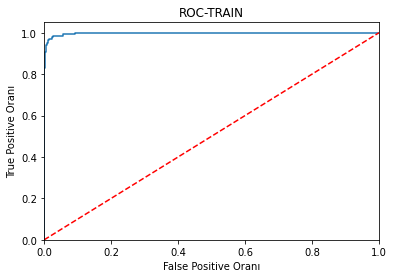

In [112]:
result(model=xgb_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

# KNN 

In [11]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

          ****** RESULT ******  
TEST Accuracy= 0.9128712871287129
TEST Report=
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       466
           1       0.14      0.03      0.04        39

    accuracy                           0.91       505
   macro avg       0.53      0.51      0.50       505
weighted avg       0.86      0.91      0.88       505
 

TRAIN Accuracy= 0.9107732980832782
TRAIN Report=
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1374
           1       0.61      0.08      0.14       139

    accuracy                           0.91      1513
   macro avg       0.76      0.54      0.55      1513
weighted avg       0.89      0.91      0.88      1513
 

Cross Validation TEST:
 0.9167843137254902
Cross Validation TRAIN:
 0.9048231090972465 

ROC CURVES


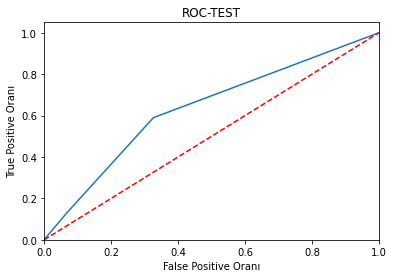

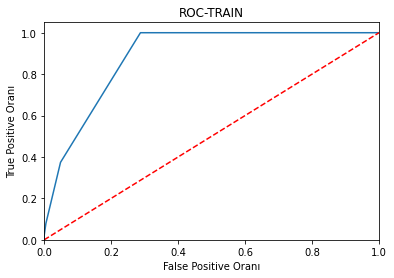

In [111]:
result(model=knn_model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)


## Model Tuning

In [ ]:
knn_params = {"n_neighbors": np.arange(3,50), "weights":["uniform", "distance"]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9081300104566052
En iyi parametreler: {'n_neighbors': 10, 'weights': 'uniform'}


In [12]:
knn = KNeighborsClassifier(10)
knn_tuned = knn.fit(X_train, y_train)

          ****** RESULT ******  
TEST Accuracy= 0.9227722772277228


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TEST Report=
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505
 

TRAIN Accuracy= 0.9081295439524124


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN Report=
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513
 

Cross Validation TEST:
 0.9227843137254901
Cross Validation TRAIN:
 0.9081300104566052 

ROC CURVES


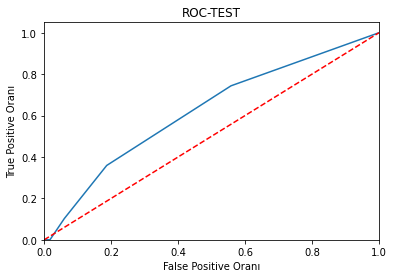

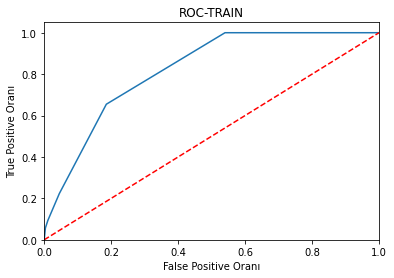

In [110]:
result(model=knn_tuned,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)